## Module 4 Exercise: 
## Reverse Engineer, Research Libraries, Describe What's Happening

In this exercise we are showing you a way of making sense of data that is similar to what you have done so far, 
but instead of you doing a blank exercise, we are asking you to explain what's happening in the cells. 
This is **Python**, while much of this module has been explained using **R**. 

**Add your answers within the input cells**

#### Cell 1

In [1]:
import scipy.cluster.hierarchy as hca
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot
%matplotlib inline
np.set_printoptions(suppress=True)
data=pd.read_csv("/dsa/data/all_datasets/mini_project/pantheon-project/database.csv")
data.head()


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


#### Cell 1 Explanation
In the space below explain the following: 
 * What are the libraries being imported and what are the main functions? 

 * What is the nature of the data?  In other words, scanning the data itself, it should be somewhat clear what the data is about. Your description does not need to be long, just clear. 

#### Cell 2

In [2]:
data1=data.drop(data.columns[[0,1,2,3,4,5,6,7,10,11,12]],axis=1)

#### Cell 2 Explanation
  * What data is being dropped? 

 * Why do you think the data is being dropped? What analytical goals or limitations are served by dropping this data?



#### Cell 3

In [3]:
data1.head()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
0,40.33333,23.50000,152,56355172,370758,31.9938
1,37.96667,23.71667,142,46812003,329662,31.9888
2,32.50000,34.90000,214,60299092,281771,31.8981
3,37.96667,23.71667,137,40307143,294213,31.6521
4,40.80000,22.51667,138,48358148,350421,31.584


#### Cell 3 Explanation

How do the data types remaining help to explain the data dropped above?


 * What are 2 or 3 questions you might be able to answer using these remaining columns? Put your answers in the context of what you understand the data above to be? 


#### Cell 4

In [4]:
data1.describe()

,latitude,longitude
count,10294.000000,10294.000000
mean,39.931860,-7.039516
std,18.688257,55.118931
min,-51.633330,-175.200560
25%,37.916670,-56.072705
50%,43.716670,4.483330
75%,50.936390,17.210003
max,70.073330,178.017780


#### Cell 4 Explanation

Why did we only get statistics on two columns?


#### Cell 5

In [5]:
data1.isnull().any()

latitude                        True
longitude                       True
article_languages              False
page_views                     False
average_views                  False
historical_popularity_index    False
dtype: bool

#### Cell 5 Explanation
What does the presenece or absence of null values tell you about the analysis you will need to perform on this data? 

#### Cell 6

In [6]:
for col in data1:
    print(col,data[col].dtypes)

latitude float64
longitude float64
article_languages object
page_views object
average_views object
historical_popularity_index object


#### Cell 6 Explanation

 * What do the data types for each object tell you about the meaning or non-meaning of null values?


 * What kind of analysis choices are available to you with regards to the remaing data types? 



#### Cell 7

In [7]:
data1['latitude']=data1['latitude'].fillna((data1['latitude'].mean()))
data1['longitude']=data1['longitude'].fillna((data1['longitude'].mean()))

#### Cell 7 Explanation

* What is being done in cell 7? 


 * Do you think it was necessary, based on what we've done so far? 




#### Cell 8

In [8]:
num_data = data1.apply(pd.to_numeric, errors='coerce')

#### Cell 8 Explanation

What do you think cell 8 accomplished with regards to the dataset and the datatypes for the columns? 

-----

**Answer this question before you answer the next question**

#### Cell 8, Part Two

In [9]:
# Edit code in this cell to evaluate the data
#  types of the data frame at this moment in time.
# -------------------------------------------------------

for col in num_data:
    print(col, num_data[col].dtypes)


latitude float64
longitude float64
article_languages float64
page_views float64
average_views float64
historical_popularity_index float64


#### Cell 9

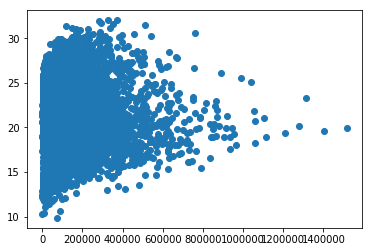

In [10]:
plt.scatter(num_data.iloc[:,4],num_data.iloc[:,5])
plt.show()

#### Cell 9 Explanation

* What is this plot showing you?  



 * What data is being plotted?





 * Can you figure out how to add labels to the plot? 





#### Cell 10

In [11]:
rows1 = pd.Series(data1.loc[data1['article_languages'] == "Not Provided"].index)
invalid_data1 = data1.loc[(rows1),]
#print(invalid_data1)
rows2 = pd.Series(data1.loc[data1['page_views'] == "Not Provided"].index)
invalid_data2 = data1.loc[(rows2),]
# print(invalid_data2)
rows3 = pd.Series(data1.loc[data1['average_views'] == "Not Provided"].index)
invalid_data3 =data1.loc[(rows3),]
# print(invalid_data3)
rows4 = pd.Series(data1.loc[data1['historical_popularity_index'] == "Not Provided"].index)
invalid_data4 = data1.loc[(rows4),]

invalid_data1 = invalid_data1.append(invalid_data2)
invalid_data1 = invalid_data1.append(invalid_data3)
invalid_data1 = invalid_data1.append(invalid_data4)

invalid_data1.drop_duplicates()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
10262,35.11737,-89.97107,Not Provided,7130053,274233,16.9662
10579,-34.60333,-58.38167,Not Provided,2846258,94875,16.1673
10665,47.36667,8.55000,31,Not Provided,25973,15.9405
11323,40.40000,-3.68333,28,Not Provided,Not Provided,Not Provided
11335,51.91667,4.50000,27,Not Provided,21404,11.3956
11216,46.05556,14.50833,26,229486,8826,Not Provided
11321,-14.46667,132.26667,26,463947,17844,Not Provided


#### Cell 10 Explanation

 * What is being done in this cell? 



 * Why do you think that is being done? 





#### Cell 11

In [12]:
data1=data1.drop(data1.index[[11321,11216,11335,11323,10665,10579,10262]])

In [13]:
data1.head()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
0,40.33333,23.50000,152,56355172,370758,31.9938
1,37.96667,23.71667,142,46812003,329662,31.9888
2,32.50000,34.90000,214,60299092,281771,31.8981
3,37.96667,23.71667,137,40307143,294213,31.6521
4,40.80000,22.51667,138,48358148,350421,31.584


#### Cell 11 Explanation:

* What's happening in this cell?


#### Cell 12

In [14]:
num_data=num_data.drop(num_data.index[[11321,11216,11335,11323,10665,10579,10262]])

In [15]:
num_data.head()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
0,40.33333,23.50000,152.0,56355172.0,370758.0,31.9938
1,37.96667,23.71667,142.0,46812003.0,329662.0,31.9888
2,32.50000,34.90000,214.0,60299092.0,281771.0,31.8981
3,37.96667,23.71667,137.0,40307143.0,294213.0,31.6521
4,40.80000,22.51667,138.0,48358148.0,350421.0,31.5840


#### Cell 12 Explanation

* What is this cell doing that is different than Cell 11? 


#### Cell 13

In [16]:
z = hca.linkage(data1,'ward')

#### Cell 13 Explanation

What does "hca.linkage" do? 
(Hint: Look at how the libraries are aliased above and use a google search to identify the API. 
Believe it or not, this is something data scientists pretty much do every day. :) )


---------

#### Cells 14 & 15

In [17]:
data1.isnull().sum()

latitude                       0
longitude                      0
article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    0
dtype: int64

In [18]:
num_data.isnull().sum()

latitude                       0
longitude                      0
article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    0
dtype: int64

#### Cells 14 and 15 explanation

* What is being calcualated here?


 * What do you think the purpose of checking these calculations might be? 





#### Cell 16

In [19]:
num_data['historical_popularity_index'] = num_data['historical_popularity_index'].fillna((num_data['historical_popularity_index'].mean()))



#### Cell 16 Explanation

 * What is cell 16 doing? 


 * Does it relate to cells 13, 14, or 15? If so, how? 


#### Cell 17

In [20]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, cop_dist = cophenet(z, pdist(num_data))
c

0.6546133408308297

#### Cell 17 Explanation
Cell 17 imports a few new libraries from scipy that you might want to look up. Do not go to great lengths to master your understanding of what's happening. Look through the line
```python
c, cop_dist = cophenet(z, pdist(num_data))
```
And suggest what the intention of this analysis step might be. 


#### Cell 18

In [21]:
y=hca.linkage(num_data,metric="euclidean",method="ward")

#### Cell 19

Text(0.5, 0.9, 'Dendrogram (center, euclidean, ward)')

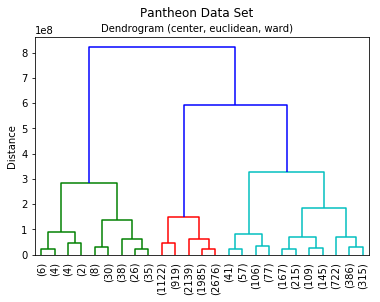

In [22]:
plt=hca.dendrogram(y,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Pantheon Data Set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

#### Cell 18 & 19 Explanation

 * What are cells 18 and 19 doing? 


 * What does the dendogram in cell 19 show you? Read from the bottom up. 
 
Remember, each point at the bottom is a cluster. each connecting line is a grouping together of the  most similar clusters.  
The Y-Axis is the distance between clusters. 



#### Remaining Cells
Look over the remaining cells and comments however you wish. Make comments or observations at the bottom of the notebook. Feel free to play with datasets and parameters as well. 

In [23]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters = fcluster(y, k, criterion='maxclust')
pd.value_counts(pd.Series(clusters))

3    8841
5    2059
4     281
2     137
1      16
dtype: int64

In [24]:
size(data)

192797

In [25]:
num_data["cluster"] = clusters
grouped = num_data.groupby('cluster')
cluster1 = num_data[num_data['cluster']==1]

In [26]:
cluster1

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,cluster
5,43.78333,10.91667,174.0,88931135.0,511098.0,31.4644,1
14,48.25833,13.03500,169.0,128368798.0,759579.0,30.5778,1
17,52.19000,-1.71000,163.0,74882297.0,459401.0,30.4398,1
22,48.40000,9.98333,166.0,89771090.0,540790.0,30.2106,1
1506,41.59556,-87.34528,147.0,145250649.0,988100.0,25.5247,1
2020,37.75775,-87.11839,80.0,83016743.0,1037709.0,25.1155,1
2329,21.30000,-157.81667,200.0,112536577.0,562683.0,24.8890,1
3176,37.78333,-122.41667,122.0,78372660.0,642399.0,24.4062,1
5181,39.75806,-94.83667,83.0,108953700.0,1312695.0,23.2988,1
7470,32.69139,-16.94528,87.0,91677973.0,1053770.0,21.8203,1


In [27]:
#This is cluster 1 in the original data.
cluster1_data=data.iloc[[9097,8793,8656,8296,8048,8010,7470,5181,3176,2329,2020,1506,22,17,14,5]]
cluster1_data


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
9097,23680998,Justin Bieber,Male,1994,London,NaN,Canada,North America,42.98370,-81.24970,Singer,Music,Arts,94,113558067,1208065,19.3922
8793,6844407,Selena Gomez,Female,1992,Grand Prairie,TX,United States,North America,32.71528,-97.01694,Singer,Music,Arts,96,87742946,913989,19.9708
8656,8135890,Miley Cyrus,Female,1992,Nashville,TN,United States,North America,36.16667,-86.78333,Actor,Film And Theatre,Arts,72,91947733,1277052,20.19
8296,2110323,Rihanna,Female,1988,Saint Michael Parish,NaN,Barbados,North America,13.11667,-59.60000,Singer,Music,Arts,85,89939558,1058112,20.7355
8048,17782843,Lady Gaga,Female,1986,New York,NY,United States,North America,40.71270,-74.00590,Musician,Music,Arts,133,104562647,786185,21.1045
8010,2150841,Lionel Messi,Male,1987,Rosario,NaN,Argentina,South America,-32.95000,-60.66667,Soccer Player,Team Sports,Sports,95,82454215,867939,21.1608
7470,623737,Cristiano Ronaldo,Male,1985,Santo António,NaN,Portugal,Europe,32.69139,-16.94528,Soccer Player,Team Sports,Sports,87,91677973,1053770,21.8203
5181,4429395,Eminem,Male,1972,Saint Joseph,MO,United States,North America,39.75806,-94.83667,Singer,Music,Arts,83,108953700,1312695,23.2988
3176,7412236,Steve Jobs,Male,1955,San Francisco-Bay Area,CA,United States,North America,37.78333,-122.41667,Designer,Design,Arts,122,78372660,642399,24.4062
2329,534366,Barack Obama,Male,1961,Honolulu,HI,United States,North America,21.30000,-157.81667,Politician,Government,Institutions,200,112536577,562683,24.889


In [28]:
num_data["cluster"] = clusters
grouped = num_data.groupby('cluster')
cluster2 = num_data[num_data['cluster']==2]

In [29]:
rows1 = pd.Series(num_data.loc[num_data['cluster']==2].index)
invalid_data1 = data.loc[(rows1),]
invalid_data1

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584
7,15924,Julius Caesar,Male,-100,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
12,18934,Muhammad,Male,570,Mecca,NaN,Saudi Arabia,Asia,21.41667,39.81667,Religious Figure,Religion,Institutions,150,43026648,286844,30.65
15,33163,Wolfgang Amadeus Mozart,Male,1756,Salzburg,NaN,Austria,Europe,47.80000,13.03333,Composer,Music,Arts,177,51363334,290188,30.5146
18,21019,Michelangelo,Male,1475,Caprese Michelangelo,NaN,Italy,Europe,43.63333,11.98333,Painter,Fine Arts,Arts,158,39992803,253119,30.4383
20,69880,Napoleon Bonaparte,Male,1769,Corsica,NaN,France,Europe,41.92670,8.73690,Politician,Government,Institutions,145,57559307,396961,30.3263


Looking at some of the variables.There is no clear discernible pattern used by the algorithm to cluster the data.And again no wonder why the cophenetic correlation coefficient is .64.
The algorithm did not do a good job clustering this data.

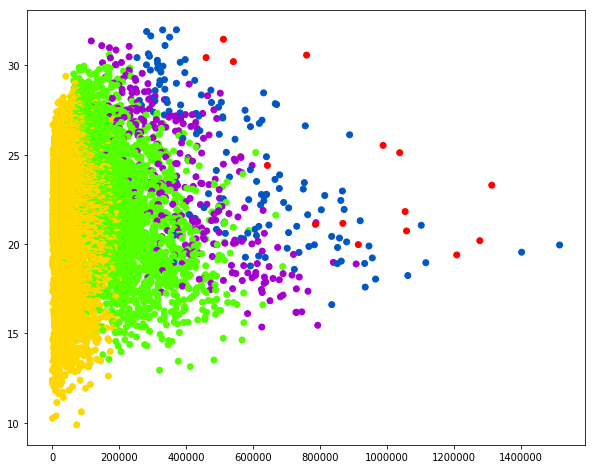

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,4], num_data.iloc[:,5], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Looking at this visualization it is no wonder why cophenetic correlation  coefficient is 65.46%

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
data=num_data[['average_views','historical_popularity_index']]
data=data.as_matrix().astype('float32',copy=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [32]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

Text(0.5, 1.0, 'Pantheon-Average Views and Historical Popularity Index')

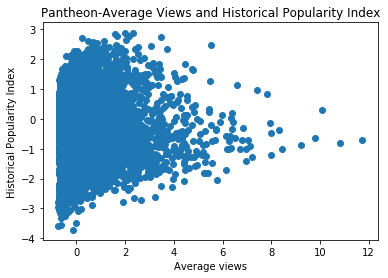

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Average views")
plt.ylabel("Historical Popularity Index")
plt.title("Pantheon-Average Views and Historical Popularity Index")

In [34]:
dbscan = DBSCAN(eps = .5, min_samples = 1500).fit(data)

In [35]:
import numpy as np

labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

In [36]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

Text(0, 0.5, 'Historical Popularity Index (scaled)')

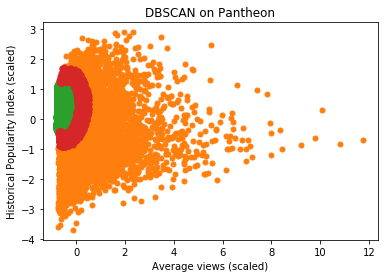

In [37]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markersize = 10)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markersize = 5)
    
plt.title("DBSCAN on Pantheon")
plt.xlabel("Average views (scaled)")
plt.ylabel("Historical Popularity Index (scaled)")

### The points with large average views figures tend to be classified as outliers.

#### Comments and Observations about remaining Cells



# Save your notebook, then `File > Close and Halt`
